<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Wave-propagation-in-Frequency-Domain" data-toc-modified-id="Wave-propagation-in-Frequency-Domain-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Wave propagation in Frequency Domain</a></span><ul class="toc-item"><li><span><a href="#The-PDE-in-esys.escript" data-toc-modified-id="The-PDE-in-esys.escript-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The PDE in <code>esys.escript</code></a></span></li><li><span><a href="#Domain-set-up" data-toc-modified-id="Domain-set-up-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Domain set up</a></span></li><li><span><a href="#PML" data-toc-modified-id="PML-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>PML</a></span></li><li><span><a href="#Definition-of-the-PDE" data-toc-modified-id="Definition-of-the-PDE-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Definition of the PDE</a></span></li><li><span><a href="#Setting--up-geophones:" data-toc-modified-id="Setting--up-geophones:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Setting  up geophones:</a></span></li></ul></li></ul></div>

by Lutz Gross, The University of Queensland, Australia
<a href="mailto:l.gross@uq.edu.au">l.gross@uq.edu.au</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

# Wave propagation in Frequency Domain

The wave equation in frequency domain is given as  

\begin{equation}\label{EQ20WAVEF}
-\nabla^T \nabla u - k^2 u = f_{\omega} \delta_{\mathbf{x}_s} 
\end{equation}
where $u$ is the unknown wave field, $\mathbf{x}_s$ is the location of the source, $f_{\omega}$ is the
source strength at angular frequency $\omega$ and $k$ is the wave number defined as 
$$
k = \frac{\omega}{c} 
$$
with wave propagation speed $c$.

A PML layer of thickness $L_{pml}$ is introduced to remove reflections from the boundary.
For this we set 
\begin{equation}\label{eqPMLGamma}
\gamma_i = 1 -\mathbf{j} \frac{S_{pml}}{k} Q_i
\end{equation}
where $S_{pml}$ is absorption strength parameter and $Q_i$ are the absorbing functions.
Horizontal absorption is applied near the left ($x_0=0$) and right boundary ($x_0=L0$):
\begin{equation}\label{EQQ0}
Q_0(\mathbf{x}) = \begin{cases}
= \left( \frac{L_{pml}-x_0}{L_{pml}} \right)^{M_{pml}} & \mbox{ if } 0 \le x_0 \le L_{pml}\\
= \left( \frac{x_0-L_0+L_{pml}}{L_{pml}} \right)^{M_{pml}} & \mbox{ if } L_0-L_{pml} \le x_0 \le L_0 \\
=0  & \mbox{ otherwise  }
\end{cases} 
\end{equation}
while vertical absorption is applied near the bottom ($x_1=0$) only: 
\begin{equation}\label{EQQ1}
Q_1(\mathbf{x}) = \begin{cases}
= \left( \frac{L_{pml}-x_1}{L_{pml}} \right)^{M_{pml}} & \mbox{ if } 0 \le x_1 \le L_{pml}\\
=0  & \mbox{ otherwise  }
\end{cases} 
\end{equation}
With the variable transformation $x_i \rightarrow \gamma_i x_i$ equations
\eqref{EQ20WAVEF}is  transfered to 
\end{equation}
\begin{equation}\label{eqWAVEF2PML}
-\frac{1}{\gamma_0}\frac{\partial }{\partial x_0 } \frac{1}{\gamma_0}\frac{\partial u }{\partial x_0 } +
-\frac{1}{\gamma_1} \frac{\partial }{\partial x_1 } \frac{1}{\gamma_1} \frac{\partial u}{\partial x_1 }  - k^2 u = f_{\omega} \delta_{\mathbf{x}_s}
\end{equation}
Mutiplication with $\gamma_0\gamma_1$ leads to
\begin{equation}\label{eqWAVEF2PML1}
-\frac{\partial }{\partial x_0} \frac{\gamma_1}{\gamma_0}\frac{\partial u }{\partial x_0 } +
-\frac{\partial }{\partial x_1} \frac{\gamma_0}{\gamma_1} \frac{\partial u}{\partial x_1 }  - \gamma_0 \gamma_1 k^2 u =f_{\omega}  \delta_{\mathbf{x}_s}
\end{equation}
We use the fact that $\gamma_0$ is not depending on $x_1$ 
and  $\gamma_1$ is not depending on $x_0$. We also assume that the source location is not located in the absorption zone and hence
$\delta_{\mathbf{x}_s} \gamma_0 \gamma_1 =\delta_{\mathbf{x}_s}$.

## The PDE in `esys.escript`

The conservation equation in `esys.escript` is
\begin{equation}\label{eqEE1}
\frac{\partial F_0}{\partial x_0 }+
 \frac{\partial F_1}{\partial x_1 } + D u = Y + y_{dirac}
\end{equation}
with pseudo flux $\mathbf{F}$  in the form 
\begin{equation} \label{EQFLUX}
\mathbf{F} = - \mathbf{A} \mathbf{\nabla} u +\mathbf{X}
\end{equation} 
To match PDE \eqref{eqWAVEF2PML1} one sets 
\begin{equation}\label{EQFLUX2}
\mathbf{F} = 
\begin{bmatrix}
 F_0 \\
 F_1
\end{bmatrix}
=
\begin{bmatrix}
 \frac{  \gamma_1}{\gamma_0}\frac{\partial u}{\partial x_0 }\\
 \frac{  \gamma_0}{\gamma_1}\frac{\partial u}{\partial x_1 }
\end{bmatrix}
\end{equation}
which means $\mathbf{X}=0$ and
\begin{equation}\label{eqAF}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix}= 
\begin{bmatrix}
 \frac{  \gamma_1}{\gamma_0}\ & 0  \\
0  &  \frac{  \gamma_0}{\gamma_1}
\end{bmatrix}
\end{equation}
In equation \eqref{eqEE1} we need to set $Y=0$,  $y_{dirac}=\delta_{\mathbf{x}_s}$ (we assume $f_{\omega}=1$), $D=- k^2 \gamma_0 \gamma_1$.


## Domain set up

The domain has a vertical extend `Width` and depth `Depth`.  
We consider a single reflector set up. The reflector is located at a depth of `D`
where the top layer has propagation speed of `c_top` 
and the bottom layer has propagation speed of `c_bottom`.
The source is located at the surface at an offset of `offset_source` from the  center vertical axis of the domain.

 <img src="Data/SonicImage1.png" alt="Sonic domain" width="800"> 

In [1]:
Width=3000.      # width of the domain [m]
NE0=1200          # number of cells along the horizontal direction  
Depth=1000.      # depth of the domain [m]
NE1=400          # number of cells along the vertical direction  

d0=300.           # depth of the reflector interface  
c_top=1800.      # propagationm speed above interface [m/s] 
c_bottom=3000.   # propagationm speed below interface [m/s] 

f = 15.            # frequence [Hz]

offset_source = 100. # offset of source from source [m]


Import of urgently needed modules:

In [2]:
import numpy as np
from esys.escript import *

#%matplotlib notebook  # uncommend for more fency plotting
import matplotlib.pyplot as plt

As usual we start the model set up with defining the domain. In this application
we also want to use point source. The locations of potential source need to be defined when the domain is 
defined and are attached to FEM nodes.

Here we use a single source named "source66" located at the surface as an offset `offset_source` from the center point of the top edge. If several sources are used  
a list of source locations and name can be defined. As we will see later the names allow to
switch on sources individually.

The list `sources` specifies the list of locations as tuple and  `source_names` gives the list of respective names which can be freely choosen. 

In [3]:
sources=  [ (Width/2+offset_source, Depth) ]
source_names = [ 'source66' ]

We set up the domain including the location and names of potential source locations.

In [4]:
from esys.finley import Rectangle
domain=Rectangle(NE0, NE1, l0=Width,l1=Depth, diracPoints=sources,  diracTags=source_names)

To define the propagation speed `c` the mask `m` is introduced distinguishing between the top layer (value `1`)
and the bottom layer (value `0`): 

In [5]:
X=ReducedFunction(domain).getX()
m=wherePositive(X[1]-(Depth-D))

New we can set the velocity field `c` and wave number `k` as $k=\frac{\omega}{c}$:

In [6]:
c=c_top*m+c_bottom*(1-m)

In [7]:
Omega=2*np.pi*f
k=Omega/c

In [8]:
c_np=convertToNumpy(c)
x_np=convertToNumpy(c.getX())

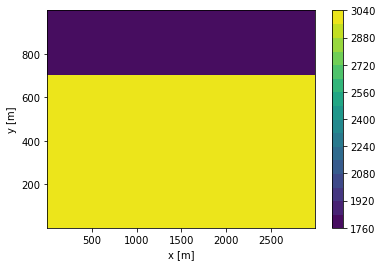

In [9]:
plt.figure()
plt.tricontourf(x_np[0], x_np[1], c_np[0], 15)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.colorbar()

## PML 

To minimize reflection from the boundary we introduce the PML conditions.
The key step is to introduce the absorbing functions $Q_i$. 
We start with the vertical  absorbing functions $Q_1$ which is defined by  \eqref{EQQ1}.
$Q_1$ is defined at the numerical integration points.

In [10]:
Lpml=200 # thickness of the absorbtion layer [m] 
Mpml=3   # decay exponent
Spml=0.5   # absorbtion strength

`Q1` is build as a product of the monomial part $\left( \frac{L_{pml}-x_1}{L_{pml}} \right)^{M_{pml}}$
and a mask that makes sure that the monomial part is applied in the layer of thickness $L_{pml}$ near the bottom 
boundary only:

In [11]:
X=Function(domain).getX()
Q1=wherePositive(Lpml-X[1])*((Lpml-X[1])/Lpml)**Mpml 

Similarly in the horizontal direction:

In [12]:
Q0_l=wherePositive(Lpml-X[0])*((Lpml-X[0])/Lpml)**Mpml
Q0_r=wherePositive(X[0]-(Width-Lpml))*((X[0]-(Width-Lpml))/Lpml)**Mpml

Let's make sure the Q's are set up correctly and take a look at the distribution. To reduce rendering time
we interpolate to element centers first.

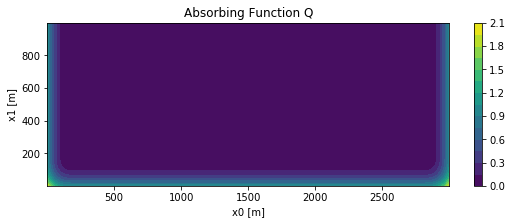

In [13]:
Q=interpolate(Q1+Q0_l+Q0_r, ReducedFunction(domain))
Q_np=convertToNumpy(Q)
x_np=convertToNumpy(Q.getX())


plt.figure(figsize=(9,3))
plt.tricontourf(x_np[0], x_np[1], Q_np[0], 15)
plt.xlabel('x0 [m]')
plt.ylabel('x1 [m]')
plt.title("Absorbing Function Q")
plt.colorbar()

Now we can set the scaling factors $\gamma_i = 1 -\mathbf{j} \frac{S_{pml}}{k} Q_i$:

In [14]:
gamma0=1-1j*Spml/k*(Q0_l+Q0_r) 
gamma1=1-1j*Spml/k*Q1

## Definition of the PDE

Now we are ready to set-up the PDE. As the PML coefficient has complex values we need to set up the PDE
as a complex PDE. Also we use the direct solver which is the better choice for this PDE.

In [15]:
from esys.escript.linearPDEs import LinearSinglePDE
pde=LinearSinglePDE(domain, isComplex=True)

Again we need to use the direct solver:

In [16]:
from esys.escript.linearPDEs import SolverOptions
pde.getSolverOptions().setSolverMethod(SolverOptions.DIRECT)

We setting the coefficient `A` following \eqref{eqAF}. We use the 
`Tensor` function to create $2 \times 2$ matrix for each integration point. It is initialized with zero (first argument) and we then modify the main diagonal entries according to the PML absorption.

In [17]:
myA=Tensor(0.,Function(domain))
myA[0,0]=gamma1/gamma0
myA[1,1]=gamma0/gamma1

And now we set `A` and `D`. Don't forget the factor `gamma1*gamma0` in `D` according to PML. 

In [23]:
pde.setValue(A=myA, D=-gamma1*gamma0*k**2)

The missing bit is the point source. This is set using a `Data` object with 
the `DiracDeltaFunctions(domain)` attribute. `Data` object with this attribute using the Dirac point 
`diracPoints` and corresponding tags `diracTags` introduced into the `domain` when it was defined. 
The source term - let's call it `src` - is set up in two steps: 
First a `Scalar` `Data` object is created which is linked with the Dirac point is initialized with zero.

In [24]:
src=Scalar(0., DiracDeltaFunctions(domain) )

Then the specific Dirac point labeled "source66" get assigned the value one. Notice that 
other Dirac point are not effected. Here we assign the value `1`:

In [25]:
src.setTaggedValue('source66' , 1.) 

This `src` is now assigned to the `y_dirac` coefficient of the PDE:

In [28]:
pde.setValue(y_dirac=src)

We are ready to get the solution:

In [29]:
u=pde.getSolution()

Let's see how it looks like:

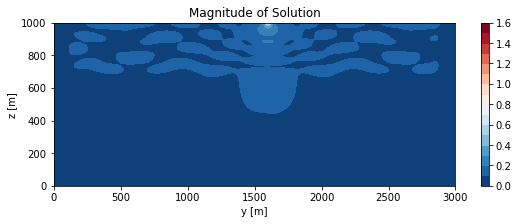

In [30]:
#u_np=convertToNumpy(u.real())
u_np=convertToNumpy(abs(u))
x_np=convertToNumpy(u.getFunctionSpace().getX())

plt.figure(figsize=(9,3))
plt.tricontourf(x_np[0], x_np[1], u_np[0], 15, cmap='RdBu_r')
plt.xlabel('y [m]')
plt.ylabel('z [m]')
plt.title("Magnitude of Solution")
plt.colorbar()

## Setting  up geophones:

To create a synthetic CDP gather or even run FWI we pick value from $u$ at specific location
simulating a line of geophones. Here we assume that `NGeophone` geophones are located at 
surface stating at offset `Offset` from the left side of the domain. The geophones are assumed to be equally spaced 
with distance `GeophoneSpacing`:

In [31]:
GeophoneSpacing=Width/NE1
NGeophone=201
OffsetGeophones=500

Let's check is the last geophone is still located in the domain:

In [32]:
assert OffsetGeophones+GeophoneSpacing * (NGeophone-1) < Width

Set the actual locations of the geophones in the domain:

In [34]:
geophone_locations = [ (OffsetGeophones+GeophoneSpacing * j, Depth) for j in range(NGeophone) ] 

We use the `Locator` to pick values from the solution `u`:

In [35]:
from esys.escript.pdetools import Locator
geophones=Locator(u.getFunctionSpace(), geophone_locations)

Now we can pick the amplitudes at the geophones:

In [36]:
u_at_geophone=geophones.getValue(abs(u))

We get the true offsets of the geophones - just in case ...

In [37]:
geophone_offsets=[ x[0] for x in geophones.getX() ]

And now we can plot the amplitude of `u` along the line of geophones:

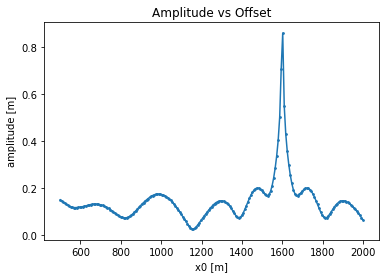

In [38]:
plt.figure()
plt.plot(geophone_offsets, u_at_geophone)
plt.scatter(geophone_offsets, u_at_geophone, s=3)
plt.xlabel('x0 [m]')
plt.ylabel('amplitude [m]')
plt.title("Amplitude vs Offset")
plt.savefig("wave.png")